In [1]:
# in this notebook, we learn how to work with sklearn. 
# then we continue our studies on how preprocessing is done.
# preprossing our data in ML has many steps. The first step is 
# scaling and normalinzg data. the other steps like managing 'categorical' data
# and so on is in the next notebook.

# 22 Feb 2023.

In [2]:
# Among all preprocessing steps,  our focus here is
     #  + Standardization, or mean removal and variance scaling
     #  + Non-linear transformation
     #  + Normalization
     #    Encoding categorical features
     #    Discretization
     #    Imputation of missing values
     #    Generating polynomial features
     #    Custom transformers

In [3]:
from sklearn import linear_model
import numpy as np

In [2]:
features = np.array([[1.1,2], [10,21], [4.1,8]])
labels = np.array([1, 10, 4])  

# Ex1: .LinearRegression()

In [3]:
reg = linear_model.LinearRegression()

In [4]:
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.83333333, 0.08333333]), -0.0833333333333357)

# Ex2.

In [5]:
reg = linear_model.LinearRegression()
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.83333333, 0.08333333]), -0.0833333333333357)

In [6]:
reg.coef_@features[0] + reg.intercept_

0.9999999999999987

In [7]:
# test
reg.coef_@np.array([1.5,6]) + reg.intercept_

1.6666666666666599

In [8]:
reg.predict(np.array([[1.5,6]]))

array([1.66666667])

# Ex 3, Ridge

In [9]:
# the above examples are eqaul to a situation
# with alpha=0 in ridge. now we want to learn and see that in Ridge itself

In [10]:
reg = linear_model.Ridge(alpha=0) 
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.83333333, 0.08333333]), -0.08333333333342807)

In [11]:
reg = linear_model.Ridge(alpha=0.5) 
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.20392496, 0.37569092]), 0.08464072357768693)

In [12]:
# read this:
#     https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Ex 3

In [13]:
reg = linear_model.Ridge(alpha=0.5, solver='auto') 
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.20392496, 0.37569092]), 0.08464072357768693)

In [14]:
reg = linear_model.Ridge(alpha=0.5, solver='cholesky') 
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.20392496, 0.37569092]), 0.08464072357768693)

In [15]:
reg = linear_model.Ridge(alpha=0.5, positive=True, solver='lbfgs') 
reg.fit(features, labels)
reg.coef_, reg.intercept_

(array([0.18483771, 0.38458795]), 0.08941341293094407)

# EX 4: classification 

In [16]:
# classification here is done with regression!!! Read the documents at


In [17]:
# supposedly this classification type is faster than logesticResgression!

In [18]:
features = np.array([[1.1,2], [10,21], [4.1,8]])
labels = np.array([1, 2, 1])  

In [19]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(features, labels)

RidgeClassifier()

In [20]:
clf.score(features, labels)

1.0

In [21]:
test_dataset_features = np.array([[1.4, 4], [4,1]])
test_dataset_labels = np.array([2,1])
clf.score(test_dataset_features, test_dataset_labels)

0.5

In [22]:
clf.predict(test_dataset_features)
# that is why score is so like the top cell

array([1, 1])

In [23]:
# in which part of the hyperplane each data sample existed.
clf.decision_function(test_dataset_features)

array([-1.03160373, -1.44602684])

# Ex6. RidgeCV

In [24]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV()
clf.fit(features, labels)

RidgeCV()

In [25]:
clf.score(features, labels)

0.9008972523346872

In [26]:
# I wanted to write a tutorial on
# every part of sklearn. But it
# seems like it has everything 
# you need to know on their official
# webpage... just read along.

# LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
features = np.array([[1.1,2], [10,21], [4.1,8]])
labels = np.array([1, 10, 4])  

In [30]:
reg.fit(features, labels)

LinearRegression()

In [31]:
reg.rank_

2

In [32]:
# returns singular values of matrix
# these values are import in svd decomposition
reg.singular_

array([15.15435655,  0.1371527 ])

In [33]:
reg.n_features_in_

2

# preprocesing

In [6]:
import numpy as  np

In [7]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [8]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [9]:
from sklearn import preprocessing

The standard scaling of a sample x is calculated as:

    z = (x - u) / s

This puts data into a samler place to analyze.

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [11]:
scaler

StandardScaler()

In [12]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [13]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [14]:
# remember that scaling is applied on featuers.
# that is why I think I makes sense.
# so it is applied on columns

In [15]:
X_scaled = (X_train-scaler.mean_)/scaler.scale_
X_scaled 

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [16]:
# or
X_scaled = scaler.transform(X_train)
X_scaled 

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [17]:
scaler.transform(X_train[0])

ValueError: Expected 2D array, got 1D array instead:
array=[ 1. -1.  2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
# you can see that data now hs zero mean and unit variance
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [46]:
X_scaled.mean(), X_scaled.std()

(4.9343245538895844e-17, 1.0)

In [47]:
# or if you don't like numpy and want to still use sklearn:
scaler = preprocessing.StandardScaler().fit(X_scaled)
scaler.mean_, scaler.scale_

(array([0., 0., 0.]), array([1., 1., 1.]))

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [48]:
scaler.inverse_transform(X_scaled)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [49]:
X_train 

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [50]:
# they are equal

In [51]:
# scale and transform all at once
scaler.fit_transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [52]:
# pipeline
# a pipeline needs a list of tuples of transform and fits
# the last one only needs fit on it

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [55]:
Y_train = X_train.sum(axis=1)
Y_train

array([2., 2., 0.])

In [56]:
# a pipeline needs a list of tuples of transform and 
# fits


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC    

In [58]:
# these inputs are 'named_steps' which
# include a list of tuples like ('<name>', tranaform)
# the last one is an estimator, here SVC().
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [59]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [60]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [61]:
pipe.score(X_train, Y_train)

1.0

In [62]:
pipe.score(X_scaled, Y_train)

0.6666666666666666

In [63]:
X_test = np.array([[0.1,0.1,2]])
pipe.predict(X_test)

array([2.])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
pipe = Pipeline([('standscaler', StandardScaler()),('regres', LogisticRegression())])

In [66]:
pipe

Pipeline(steps=[('standscaler', StandardScaler()),
                ('regres', LogisticRegression())])

In [67]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('standscaler', StandardScaler()),
                ('regres', LogisticRegression())])

In [68]:
pipe.score(X_train, Y_train)

1.0

In [69]:
pipe.score(X_scaled, Y_train)

1.0

In [70]:
X_test = np.array([[0.1,0.1,2]])
pipe.predict(X_test)

array([2.])

In [71]:
#  MinMaxScaler and MaxAbsScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# [0, 1] scaling is the defualt
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [ ]:
scaler = MinMaxScaler((1,2))
scaler.fit_transform(X_train)

In [ ]:
scaler = MinMaxScaler((-3,-1))
scaler.fit_transform(X_train)

In [76]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [77]:
from sklearn.preprocessing import MaxAbsScaler

In [78]:
# scales into [-1,1] by dividing from max
scaler = MaxAbsScaler()
scaler.fit_transform(X_train)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [80]:
# does not use dividing but used another method
scaler = MinMaxScaler((-1,1))
scaler.fit_transform(X_train)

array([[ 0.        , -1.        ,  1.        ],
       [ 1.        ,  0.        , -0.33333333],
       [-1.        ,  1.        , -1.        ]])

# nonliner transoform

In [85]:
# Two types of transformations are available: quantile transforms and power transforms. 
# Both quantile and power transforms are based on monotonic transformations of the features 
# and thus preserve the rank of the values along each feature

In [86]:
# A quantile transform will map a variable’s probability distribution to another 
# probability distribution.

d

In [91]:
from sklearn.preprocessing import QuantileTransformer

In [96]:
# in following we showed how this transorm can be normal or uniform

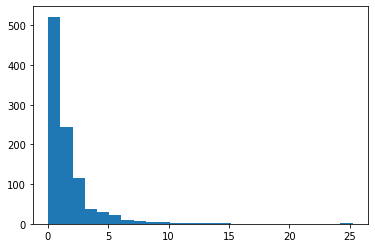

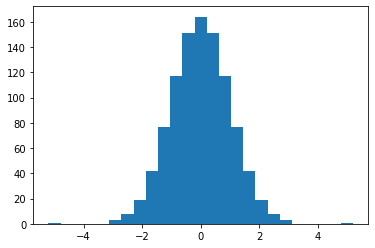

In [111]:
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = np.exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape(-1,1)
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

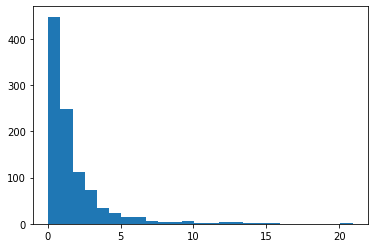

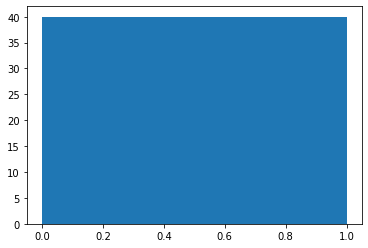

In [100]:
data = randn(1000)
# add a skew to the data distribution
data = np.exp(data)
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape(-1,1)
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='uniform')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

In [99]:
# So, not only the data needs to be in a prespecified range their distribution should have
# no skew

In [101]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [107]:
quantile_transformer = QuantileTransformer(output_distribution='uniform')
quantile_transformer.fit_transform(X_train)

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.5, 0. , 1. ],
       [1. , 0.5, 0.5],
       [0. , 1. , 0. ]])

In [108]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit_transform(X_train)

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  warnings.warn(


array([[ 0.        , -5.19933758,  5.19933758],
       [ 5.19933758,  0.        ,  0.        ],
       [-5.19933758,  5.19933758, -5.19933758]])

In [113]:
from sklearn.datasets import load_iris

In [114]:
iris = load_iris()

In [116]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [119]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [122]:
# iris.data[:,0]

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

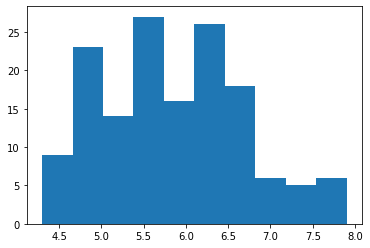

In [132]:
pyplot.hist(iris.data[:,0])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

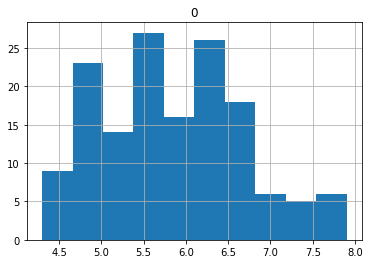

In [135]:
import pandas as pd
pd.DataFrame(iris.data[:,0]).hist()

(array([[ 0.,  0.,  0.,  0.,  0., 11., 48., 49., 31., 11.],
        [ 0.,  0., 11., 96., 39.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 44.,  6.,  1., 10., 34., 30., 20.,  5.,  0.],
        [50., 52., 45.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.88, 1.66, 2.44, 3.22, 4.  , 4.78, 5.56, 6.34, 7.12, 7.9 ]),
 <a list of 4 BarContainer objects>)

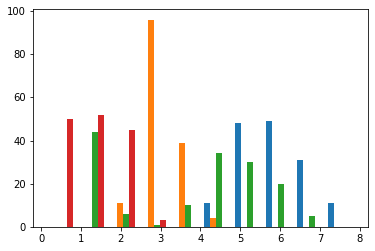

In [136]:
pyplot.hist(iris.data)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

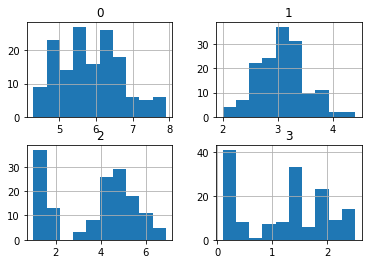

In [137]:
pd.DataFrame(iris.data).hist()

In [146]:
# as you can see the feautures are not scaled well (their centers is not zero).

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler = StandardScaler()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

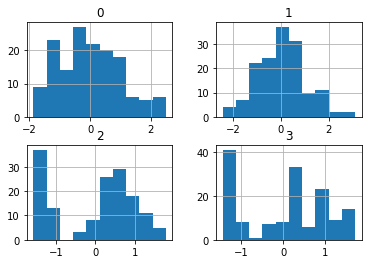

In [149]:
standard_scaled_iris = scaler.fit_transform(iris.data)
pd.DataFrame(standard_scaled_iris).hist()

In [152]:
# now the data data are centered around 0 but they are not noramlized or you can see
# skewness in them

In [156]:
from sklearn.preprocessing import QuantileTransformer

In [233]:
quantile_transformer = QuantileTransformer(output_distribution='normal')

In [234]:
quan_tansformed = quantile_transformer.fit_transform(iris.data)

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

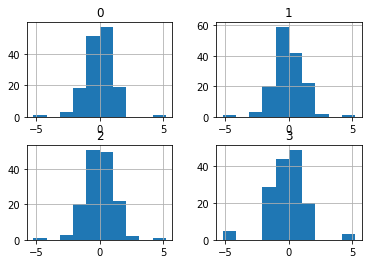

In [235]:
pd.DataFrame(quan_tansformed).hist()

In [236]:
# cool. now data is trasnformed into a kinda normal distributed data.

In [164]:
# according to [1],  whenver you
# transform your data like this the score of your training will be enhanced.

# [1] https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

In [166]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()

In [171]:
# when data is not transformed (preprocessed)
clf = RidgeClassifier()
clf.fit(iris.data, iris.target)
clf.score(iris.data, iris.target)

0.8533333333333334

In [173]:
# when data is not transformed (preprocessed)
clf = RidgeClassifier()
clf.fit(quan_tansformed, iris.target)
clf.score(quan_tansformed, iris.target)

0.8933333333333333

In [176]:
# it was best if I splitted the dataset into test and train and then do the training 
# and compre these two. But, as of now it is enough. Thus the median of the input becomes 
# the mean of the output, centered at 0

In [248]:
# There is a difference between a normalizer that sklearn offers and normal qunitle tranform
# in fact normalizer normalizes (norm=1) for each samples (row) not features.

In [249]:
from sklearn.preprocessing import Normalizer

In [238]:
normalizer = Normalizer()

In [255]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [256]:
normalizer.fit_transform(X_train)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [254]:
# row norm (sample's norm) is equal to1
np.linalg.norm(a, axis=0)

0.9999999988637723

In [258]:
# Scaling inputs to unit norms is a common operation for text classification or 
# clustering for instance. 

In [263]:
# sample normlizer of iris
iris_normalized_sample = normalizer.fit_transform(iris.data)

In [264]:
# x_normalized

In [272]:
# only feauture normalizer
quantile_transformer = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(iris.data)
iris_normalized_feature = quantile_transformer.fit_transform(iris_normalized)

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

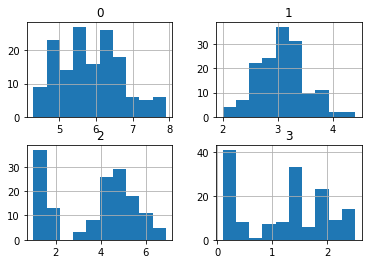

In [273]:
pd.DataFrame(iris.data).hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

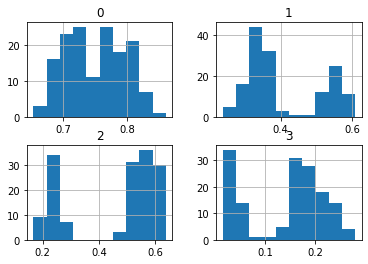

In [274]:
pd.DataFrame(iris_normalized_sample).hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

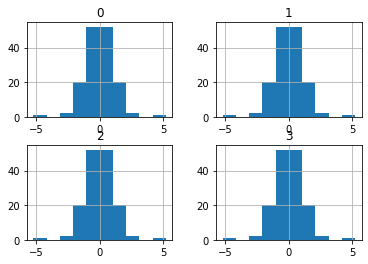

In [275]:
pd.DataFrame(iris_normalized_feature).hist()

In [290]:
# writing a small pipeline. Putting all of above explanation in a piple line.
# notice that, as we don't want to train, adding an estimator at the end of pipleline
# is not necessary. Otherwise, it is needed to add sth like ('svc', SVC()) to let the pipleline
# train.

In [286]:
pipe = Pipeline([('scaler', StandardScaler()), ('feature_normalizer', QuantileTransformer(output_distribution='normal'))])

In [287]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_normalizer',
                 QuantileTransformer(output_distribution='normal'))])

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

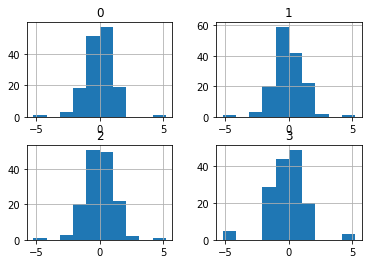

In [289]:
new_data = pipe.fit_transform(iris.data)
pd.DataFrame(new_data).hist()

In [292]:
# instead of nomalizing you can also use uniforming 
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('feature_normalizer', QuantileTransformer(output_distribution='uniform'))])

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

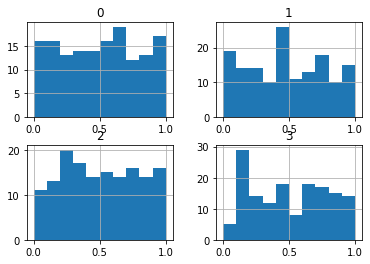

In [293]:
new_data = pipe.fit_transform(iris.data)
pd.DataFrame(new_data).hist()

In [294]:
# both normalizing and uniforming are accepted in ML preprocessing.
# only thing matter here is which one suits our problem.

In [295]:
from sklearn.linear_model import RidgeClassifier

In [296]:
# when data is not transformed to a uniform distribution(preprocessed)
clf = RidgeClassifier()
clf.fit(new_data, iris.target)
clf.score(new_data, iris.target)

0.8866666666666667